<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.---Unsupervised-Learning/blob/main/Clustering/Mahfuzur_K_Means_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Customer segmentation.png](https://miro.medium.com/max/700/1*rFATWK6tWBrDJ1o1rzEZ8w.png)

# Source of Data



The San Francisco Controller's Office maintains a database of the salary and benefits 

paid to City employees since fiscal year 2013. This data is summarized and presented on 

the Employee Compensation  and is also 

available in CSV format in the directory. 



## Overview of the problem




### Description of Data : 

Each row is an employee, and has columns about employee's information like their job type,salary, hours of overtime,other benefits etc.Overall there are 22 columns.



### Column definations:

1. Year Type	Fiscal (July through June) or Calendar (January through December)

2. Year	        An accounting period of 12 months. The City and County of San Francisco                 operates on a fiscal year that begins on July 1 and ends on June 30 the                 following year. The Fiscal Year ending June 30, 2012 is represented as                   FY2011-2012.

3. Organization Group Code	Org Group is a group of Departments. For example, the Public                             Protection Org Group includes departments such as the                                   Police, Fire, Adult Probation, District Attorney,                                       and Sheriff.

4. Organization Group	    Org Group is a group of Departments. For example, the Public                             Protection Org Group includes departments such as the                                   Police, Fire, Adult Probation, District Attorney, and                                   Sheriff.

5. Department Code	        Departments are the primary organizational unit used by the                             City and County of San Francisco. Examples include           
7. Code	                    Unions represent employees in collective bargaining                                     agreements. A job belongs to one union, although some jobs                               are unrepresented (usually temporarily).

8. Union	                Unions represent employees in collective bargaining                                     agreements. A job belongs to one union, although some jobs                               are unrepresented (usually temporarily).

9. Job Family Code	        Job Family combines similar Jobs into meaningful groups.

10. Job Family	            Job Family combines similar Jobs into meaningful groups.

11. Job Code	            Jobs are defined by the Human Resources classification unit.                             Examples include gardeners, police officers, and                                         accountants.

12. Job	                    Jobs are defined by the Human Resources classification unit.                             Examples include gardeners, police officers, and                                         accountants.

13. Employee Identifier	    Each distinct number in the “Employee Identifier” column                                 represents one employee. These identifying numbers are not                               meaningful but rather are randomly assigned for the purpose                             of building this dataset. The column does not appear on the                             Employee Compensation report hosted on openbook.sfgov.org,                               but that report does show one row for each employee.                                     Employee ID has been included here to allow users to                                     reconstruct the original report. Note that each employee’s                               identifier will change each time this dataset is updated, so                             comparisons by employee across multiple versions of the                                 dataset are not possible.

14. Salaries	            Normal salaries paid to permanent or temporary City                                     employees.


15. Overtime	            Amounts paid to City employees working in excess of 40 hours                             per week.

16. Other Salaries	        Various irregular payments made to City employees including                             premium pay, incentive pay, or other one-time payments.

17. Total Salary	        The sum of all salaries paid to City employees.

18. Retirement	            City contributions to employee retirement plans.

19. Health and Dental	    City-paid premiums to health and dental insurance plans                                 covering City employees. To protect confidentiality as                                   legally required, pro-rated citywide averages are presented                             in lieu of employee-specific health and dental benefits.

20. Other Benefits	        Mandatory benefits paid on behalf of employees, such as                                 Social Security (FICA and Medicare) contributions,                                       unemployment insurance premiums, and minor discretionary                                 benefits not included in the above categories.

21. Total Benefits	        The sum of all benefits paid to City employees.

22. Total Compensation	    The sum of all salaries and benefits paid to City employees.

  


![Customer segmentation.png](https://miro.medium.com/max/700/1*jg90VC_It42Cq0KZO6JQ3A.png)

# Try answering the below questions to stay on the right track for solving the assignment.

###  Do you need to reduce the number of columns?

###  Is your data clean?

### What all parameters do we need to give to our clustering algorithm?

### How can we get these parameters?

### Does your data has some interesting insights?

### Objective of Problem :

You have to fit the data to a clustering model.

Find the number of clusters for the data.

Try fitting the model to both the clustering algorithms you have learnt,K-Means and Hierarchical clustering.

Which one suits this data better?

Your model should help the State authorities/Policy makers to understand how they can improve on their policies for employee benefits.


# You are good to GO!!

In [1]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster,cophenet
from scipy.spatial.distance import pdist

In [4]:
df = pd.read_csv('employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [5]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [6]:
df.shape

(683277, 22)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [9]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [10]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols.head()

,Job Family Code,Job Code,Year Type,Organization Group,Department Code,Department,Union,Job Family,Job
0,1000,1021,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1
1,1000,1023,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3
2,1000,1031,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant
3,1000,1054,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal
4,1000,1062,Calendar,Public Protection,ADP,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst


In [11]:
df = df.select_dtypes(include=['float64'])

In [12]:
df.columns

Index(['Union Code', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary',
       'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [13]:
df.shape

(682919, 10)

In [14]:
df.head()

,Union Code,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,21.0,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,21.0,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,21.0,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,21.0,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,21.0,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [15]:
for cols in df.columns:
  print(cols, 'has:::::', df[cols].nunique(), 'Unique Values')

Union Code has::::: 70 Unique Values
Salaries has::::: 498267 Unique Values
Overtime has::::: 261976 Unique Values
Other Salaries has::::: 307729 Unique Values
Total Salary has::::: 614930 Unique Values
Retirement has::::: 451568 Unique Values
Health and Dental has::::: 209844 Unique Values
Other Benefits has::::: 496051 Unique Values
Total Benefits has::::: 616180 Unique Values
Total Compensation has::::: 658354 Unique Values


In [16]:
df = df.drop(['Union Code', 'Other Salaries'], axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Salaries            682919 non-null  float64
 1   Overtime            682919 non-null  float64
 2   Total Salary        682919 non-null  float64
 3   Retirement          682919 non-null  float64
 4   Health and Dental   682919 non-null  float64
 5   Other Benefits      682919 non-null  float64
 6   Total Benefits      682919 non-null  float64
 7   Total Compensation  682919 non-null  float64
dtypes: float64(8)
memory usage: 46.9 MB


In [18]:
df.describe()

,Salaries,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000
mean,69493.840390,5476.651604,78601.964004,13664.568361,9950.032677,5040.594347,28655.195384,107257.159388
std,47766.600651,13112.641274,55745.985286,10109.190457,5732.227856,3787.819609,17866.946463,72282.967638
min,-68771.780000,-12308.660000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,29073.460000,0.000000,31756.370000,4679.095000,4784.540000,1872.705000,11748.130000,44540.265000
50%,67911.050000,0.000000,74894.560000,13862.820000,12501.250000,4878.880000,32528.910000,107563.090000
75%,100451.055000,4226.340000,112692.195000,20155.985000,14037.160000,7527.095000,40920.955000,154201.665000
max,651936.710000,321523.310000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


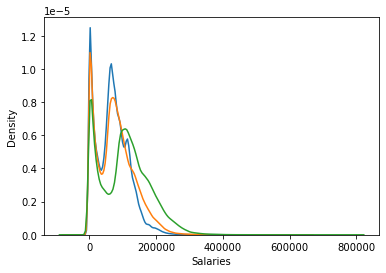

In [19]:
salary = ['Salaries', 'Total Salary', 'Total Compensation']
for col in salary:
    ax_salary = sns.kdeplot(df[col])
    ax_salary

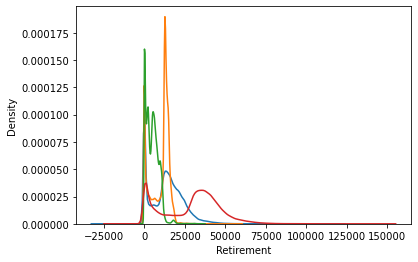

In [20]:
benefits = ['Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits']
for col in benefits:
    ax_benefits = sns.kdeplot(df[col])
    ax_benefits

In [21]:
## Remove salaries lower than 35,000
df[df['Salaries']<200000].count()

Salaries              676011
Overtime              676011
Total Salary          676011
Retirement            676011
Health and Dental     676011
Other Benefits        676011
Total Benefits        676011
Total Compensation    676011
dtype: int64

In [22]:
df = df[df['Salaries']<200000]
df = df[df['Salaries']>20000]

In [23]:
df.shape

(534905, 8)

In [24]:
headers = df.columns
print(len(headers))

8


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [26]:
df = pd.DataFrame(df, columns = headers)

In [27]:
df.head()

,Salaries,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,-0.724333,-0.478814,-0.834378,-0.679098,-0.041660,-0.474605,-0.561731,-0.800440
1,-0.720385,-0.478814,-0.831186,-0.800217,-1.230560,-0.407388,-0.995137,-0.896753
2,-0.559726,-0.478814,-0.701263,-0.523657,0.196118,-0.423226,-0.376024,-0.650815
3,0.475994,-0.478814,-0.020338,0.370540,0.196118,0.409338,0.400196,0.074922
4,-1.357666,-0.478814,-1.346546,-1.167832,-2.062787,-1.064482,-1.658393,-1.463318


C:\Users\mahfu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


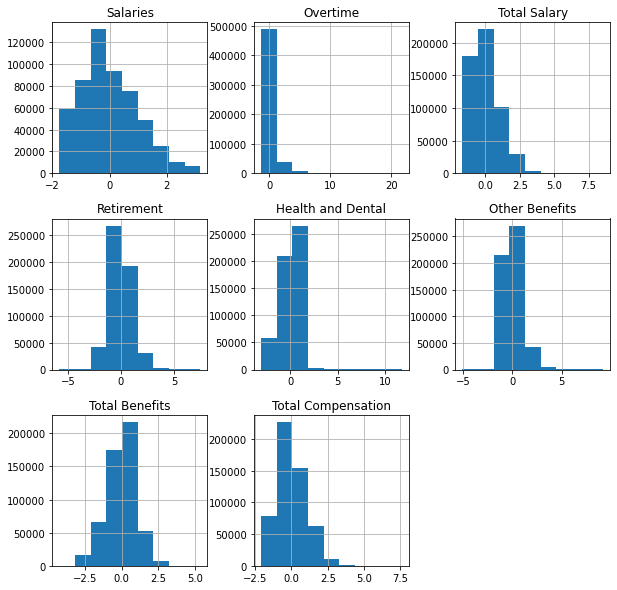

In [28]:
df.hist(bins = 9, figsize = (10,10));

(array([8.00000e+00, 1.30000e+01, 2.16200e+04, 1.42099e+05, 2.69782e+05,
        8.83180e+04, 1.17660e+04, 1.12800e+03, 1.40000e+02, 3.10000e+01]),
 array([-5.7929369 , -4.46696284, -3.14098878, -1.81501472, -0.48904066,
         0.8369334 ,  2.16290746,  3.48888152,  4.81485558,  6.14082964,
         7.46680369]),
 <BarContainer object of 10 artists>)

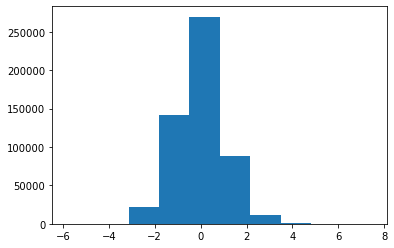

In [29]:
plt.hist(df.Retirement)

In [30]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 2)

In [31]:
# kmeans.fit(df)

In [32]:
# print(kmeans.cluster_centers_)

In [33]:
# kmeans.inertia_

In [34]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
# inertia is the mean squared distace and their centroids

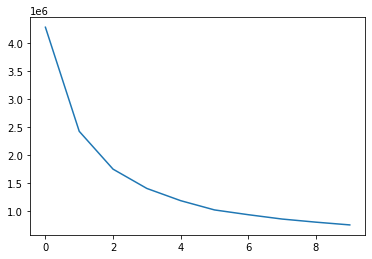

In [35]:
# plotting
plt.plot(wcss);

In [36]:
wcss

[4279240.000000138,
 2423624.5662476355,
 1749185.7030357076,
 1405004.406012358,
 1187160.3275725667,
 1022179.0427606822,
 937002.5962598536,
 859524.0145618288,
 804050.4802871385,
 754977.1345064312]

In [37]:
scores = np.array(wcss)
print(scores)
dif_scores = scores/scores[0]
print(dif_scores)
dif_scores = np.diff(dif_scores)
print(dif_scores)
n_clusters = np.argwhere(dif_scores<np.quantile(dif_scores, 0.75))[-1][0] # taking 75th percentile since its a big data
print('The optimal number of clusters are:',  n_clusters)

[4279240.00000014 2423624.56624764 1749185.70303571 1405004.40601236
 1187160.32757257 1022179.04276068  937002.59625985  859524.01456183
  804050.48028714  754977.13450643]
[1.         0.56636799 0.40876083 0.32833036 0.27742317 0.2388693
 0.21896472 0.20085903 0.18789563 0.17642786]
[-0.43363201 -0.15760716 -0.08043047 -0.05090719 -0.03855388 -0.01990457
 -0.01810569 -0.01296341 -0.01146777]
The optimal number of clusters are: 5


In [38]:
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df)
print(kmeans.cluster_centers_)

[[-1.24295741e+00 -3.86231637e-01 -1.17293359e+00 -1.36940235e+00
  -1.75002974e+00 -9.17152168e-01 -1.64782068e+00 -1.32102267e+00]
 [ 4.46352785e-01  1.47644230e-03  3.76585509e-01  4.41223494e-01
   3.78300398e-01  3.23602722e-01  4.79695614e-01  4.12869751e-01]
 [-4.95921936e-01 -2.54718408e-01 -5.26302604e-01 -4.02853568e-01
   1.69212610e-01 -2.13774822e-01 -2.54486997e-01 -4.82115942e-01]
 [ 1.02241614e+00  2.71517397e+00  1.90747279e+00  1.15261598e+00
   7.30145951e-01 -4.57769462e-01  8.33654008e-01  1.72709417e+00]
 [ 1.72664899e+00 -3.16277241e-01  1.33264797e+00  1.53397501e+00
   6.21862819e-01  1.56332559e+00  1.56275696e+00  1.43029940e+00]]


In [39]:
df['labels'] = kmeans.labels_
df.head()

,Salaries,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,labels
0,-0.724333,-0.478814,-0.834378,-0.679098,-0.041660,-0.474605,-0.561731,-0.800440,2
1,-0.720385,-0.478814,-0.831186,-0.800217,-1.230560,-0.407388,-0.995137,-0.896753,0
2,-0.559726,-0.478814,-0.701263,-0.523657,0.196118,-0.423226,-0.376024,-0.650815,2
3,0.475994,-0.478814,-0.020338,0.370540,0.196118,0.409338,0.400196,0.074922,1
4,-1.357666,-0.478814,-1.346546,-1.167832,-2.062787,-1.064482,-1.658393,-1.463318,0


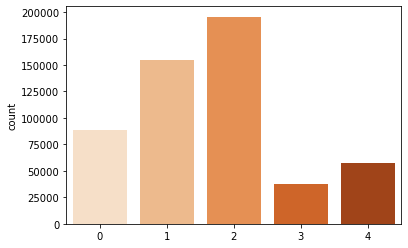

In [40]:
sns.countplot(x = kmeans.labels_, palette='Oranges')
plt.show();

Text(0, 0.5, 'Total Benefits')

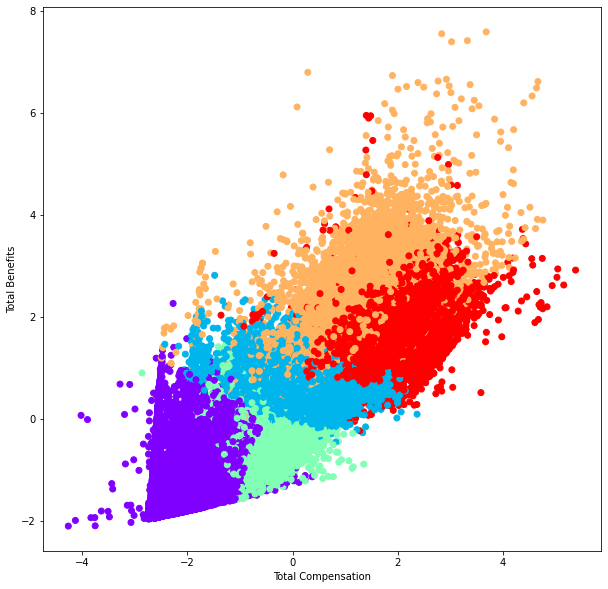

In [41]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['Total Benefits'], y = df['Total Compensation'],c=df['labels'], cmap='rainbow')
plt.xlabel('Total Compensation')
plt.ylabel('Total Benefits')

In [42]:
df.head()

,Salaries,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,labels
0,-0.724333,-0.478814,-0.834378,-0.679098,-0.041660,-0.474605,-0.561731,-0.800440,2
1,-0.720385,-0.478814,-0.831186,-0.800217,-1.230560,-0.407388,-0.995137,-0.896753,0
2,-0.559726,-0.478814,-0.701263,-0.523657,0.196118,-0.423226,-0.376024,-0.650815,2
3,0.475994,-0.478814,-0.020338,0.370540,0.196118,0.409338,0.400196,0.074922,1
4,-1.357666,-0.478814,-1.346546,-1.167832,-2.062787,-1.064482,-1.658393,-1.463318,0


In [43]:
df.shape

(534905, 9)

In [44]:
df =  df.drop(['labels'], axis = 1)
df.shape

(534905, 8)

In [45]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(df, test_size = .02)

In [46]:
test.head()

,Salaries,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
331791,-0.391718,-0.441374,-0.381988,-0.326033,0.236425,0.100954,-0.103511,-0.331392
139877,1.395301,-0.478814,0.879739,1.067207,0.474155,1.378491,1.175782,0.977090
520825,0.226996,-0.478814,-0.030433,0.360056,0.781788,0.462862,0.592224,0.110602
424247,2.052295,0.560604,2.040267,0.390415,1.416950,0.735377,0.882262,1.845179
401599,0.293360,-0.333937,0.121563,0.090573,0.594630,-1.368456,-0.110731,0.072681


In [47]:
test.shape

(10699, 8)

TypeError: object of type 'NoneType' has no len()

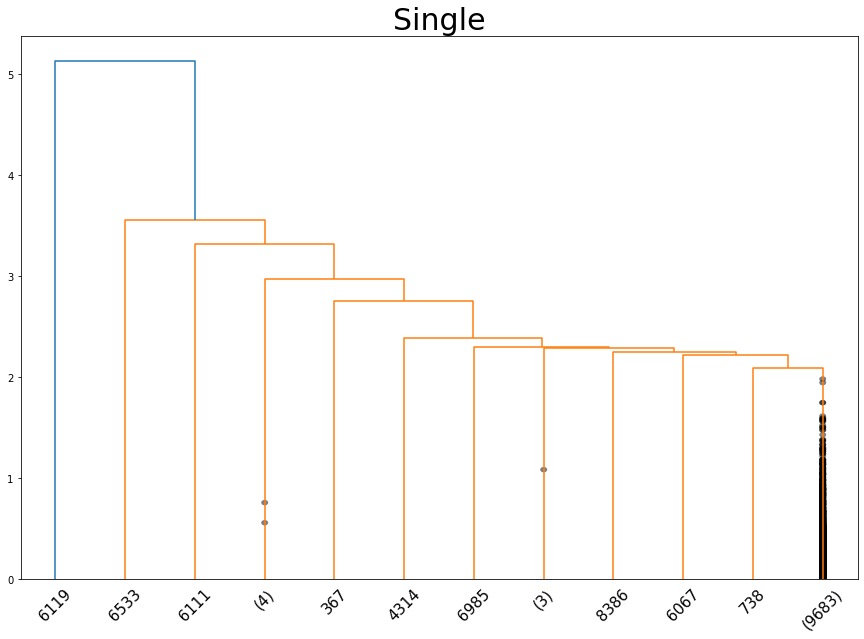

In [49]:
plt.figure(figsize = (15,10))
Z = linkage(test[1000:], method='single')
# print('Z-Shape:', Z.shape)
plt.title('Single', size = 30)
dendrogram(Z, orientation = 'top', truncate_mode = 'lastp', p=12, get_leaves = False, leaf_rotation = 45, leaf_font_size = 15, show_contracted = True)
plt.xlabel('Cluster Size', fontsize = 30)
plt.ylabel('Distances', fontsize = 30)
plt.show();